# Homework 2
Eric Gagliano (egagli)

## Problem 1

Using the observations of peak flow data for the Sauk River, we are going to investigate whether a change in flood statistics occurred around 1977.

### A. Descriptive Plots: Decide which of your plots from Homework 1 are relevant to the question of whether a change in flood statistics occurred in the Sauk River around 1977.

* *Include these plots from Homework 1 here.*

In [1]:
#import all required modules and read in the data files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
Sauk_data_file = 'Sauk_peak_WY1929_2017.xlsx'
Sauk_data = pd.read_excel(Sauk_data_file,header=6)
Sauk_data = Sauk_data[1:]
Sauk_data['peak_va'] = Sauk_data['peak_va'].astype('int64')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# subset data by year 
Sauk_data_before_1977 = Sauk_data[Sauk_data['water_year']<1977]
Sauk_data_after_1977 = Sauk_data[Sauk_data['water_year']>=1977]

In [3]:
# The following cunnane_quantile() function taken from Steven Pestana: (https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab1/empirical-distributions.ipynb)
def cunnane_quantile(df, column_name): 
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

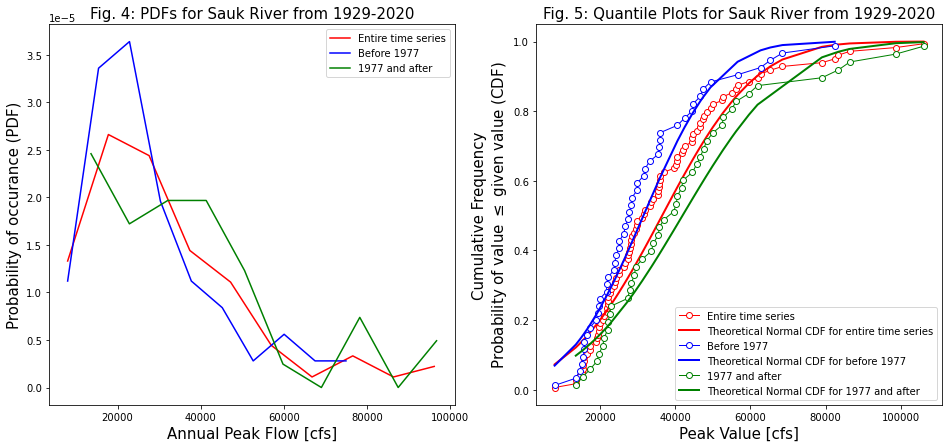

In [4]:
# get mean and std for CDF calculation for each time period
sample_values0 = Sauk_data['peak_va'].sort_values()
sample_mean0 = Sauk_data['peak_va'].mean()
sample_std0 = Sauk_data['peak_va'].std(ddof=1) 
normal_cdf0 = stats.norm.cdf(sample_values0, sample_mean0, sample_std0)
sample_values1 = Sauk_data_before_1977['peak_va'].sort_values()
sample_mean1 = Sauk_data_before_1977['peak_va'].mean()
sample_std1 = Sauk_data_before_1977['peak_va'].std(ddof=1)
normal_cdf1 = stats.norm.cdf(sample_values1, sample_mean1, sample_std1)
sample_values2 = Sauk_data_after_1977['peak_va'].sort_values()
sample_mean2 = Sauk_data_after_1977['peak_va'].mean()
sample_std2 = Sauk_data_after_1977['peak_va'].std(ddof=1) 
normal_cdf2 = stats.norm.cdf(sample_values2, sample_mean2, sample_std2)

f,ax = plt.subplots(1,2,figsize=(16,7))

# create PDFs using histogram method outlined in emperical-distrubtions.ipynb
counts0, bin_edges0 = np.histogram(Sauk_data['peak_va'], bins=10, density=True)
counts1, bin_edges1 = np.histogram(Sauk_data_before_1977['peak_va'], bins=10, density=True)
counts2, bin_edges2 = np.histogram(Sauk_data_after_1977['peak_va'], bins=10, density=True)
ax[0].plot(bin_edges0[:-1],counts0,color='r',label='Entire time series')
ax[0].plot(bin_edges1[:-1],counts1,color='b',label='Before 1977')
ax[0].plot(bin_edges2[:-1],counts2,color='g',label='1977 and after')
ax[0].legend()
ax[0].set_title('Fig. 4: PDFs for Sauk River from 1929-2020',fontsize=15)
ax[0].set_xlabel('Annual Peak Flow [cfs]', fontsize=15)
ax[0].set_ylabel('Probability of occurance (PDF)', fontsize=15)

# plot CDFs on quantile plots
cunnane_quantile(Sauk_data,'peak_va').plot(ax=ax[1],x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='r', 
               color='r',label='Entire time series')
ax[1].plot(sample_values0,normal_cdf0,'r-', lw=2, label='Theoretical Normal CDF for entire time series')
cunnane_quantile(Sauk_data_before_1977,'peak_va').plot(ax=ax[1],x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='b', 
               color='b',label='Before 1977')
ax[1].plot(sample_values1,normal_cdf1,'b-', lw=2, label='Theoretical Normal CDF for before 1977')
cunnane_quantile(Sauk_data_after_1977,'peak_va').plot(ax=ax[1],x='peak_va',y='cunnane_plotting_position',linestyle='-', lw=1, 
               marker='o', markerfacecolor='white', markeredgecolor='g', 
               color='g',label='1977 and after')
ax[1].plot(sample_values2,normal_cdf2,'g-', lw=2, label='Theoretical Normal CDF for 1977 and after')

ax[1].legend()
ax[1].set_title('Fig. 5: Quantile Plots for Sauk River from 1929-2020',fontsize=15)
ax[1].set_xlabel('Peak Value [cfs]',fontsize=15)
ax[1].set_ylabel('Cumulative Frequency\nProbability of value $\leq$ given value (CDF)',fontsize=15);

* *Discuss what you can see visually in the graphs that would lead you to believe that a change has or has not occurred.*

Using these plots from homework 1, we can visually see a change in mean from 1929-1977 to 1977-2020. Figure 4 shows the PDFs of the two time periods, and we can see a visual and marked shift to the right from pre-1977 to post-1977 which indicates a distribution with higher values and thus a higher mean. We can see in figure 5 that the quantile plots from post-1977 are very clearly uniformly shifted to the right as well, also indicating a positive shift in distribution. 

### B. Two-sample test for a change in the mean: Test for statistical significance of the observed change in the mean annual peak flow around 1977.

* *Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region.*

In [5]:
# define alpha level and z cutoffs
alpha = 0.05
lower_z_cutoff = stats.norm.ppf(alpha/2)
upper_z_cutoff = stats.norm.ppf(1-alpha/2)
print(f'For a two tailed z test with an alpha level of 0.05, the lower z_a will be {lower_z_cutoff:.4} and the upper z_a will be {upper_z_cutoff:.4}.')

For a two tailed z test with an alpha level of 0.05, the lower z_a will be -1.96 and the upper z_a will be 1.96.


Visualized, this looks like:

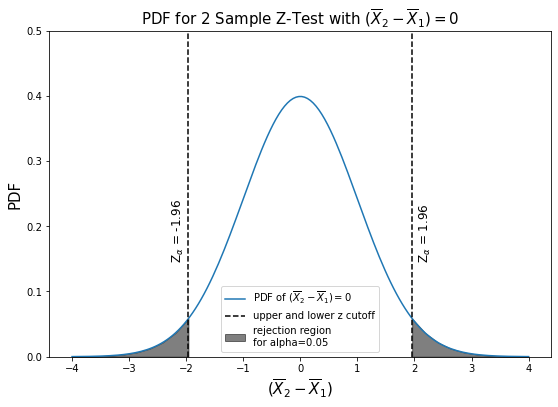

In [6]:
# visualize the two tailed test
f, ax = plt.subplots(figsize=(9,6))
x = np.linspace(-4, 4, num=160)
ax.plot(x, stats.norm.pdf(x, 0, 1), label='PDF of $(\overline{X}_2 - \overline{X}_1)=0$')
ax.axvline(lower_z_cutoff, color='black', linestyle='--', label=f'upper and lower z cutoff')
ax.axvline(upper_z_cutoff, color='black', linestyle='--')
plt.text(lower_z_cutoff-0.3, 0.15, r'Z$_{\alpha}$ = '+ str(round(lower_z_cutoff,3)),fontsize=12, color='k',rotation=90)
plt.text(upper_z_cutoff+0.1, 0.15, r'Z$_{\alpha}$ = '+ str(round(upper_z_cutoff,3)),fontsize=12, color='k',rotation=90)
shade1 = np.linspace(upper_z_cutoff, np.max(x), 10)
ax.fill_between(shade1, stats.norm.pdf(shade1, 0, 1) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(alpha,2)))
shade2 = np.linspace(np.min(x), lower_z_cutoff, 10)
ax.fill_between(shade2, stats.norm.pdf(shade2, 0, 1) ,  color='k', alpha=0.5)
ax.set_ylim((0,0.5))
ax.set_title('PDF for 2 Sample Z-Test with $(\overline{X}_2 - \overline{X}_1)=0$',fontsize=15)
ax.set_xlabel('($\overline{X}_2 - \overline{X}_1$)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.legend();

* *Discuss why using the z-distribution is appropriate here.*

The z distribution is appropriate here because while the river peak flows indidivudally may not be normally distributed, thier means are normally distributed.

* *Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).*

In [7]:
# get mean and std
mean_before = Sauk_data_before_1977['peak_va'].mean()
mean_after = Sauk_data_after_1977['peak_va'].mean()
std_before = Sauk_data_before_1977['peak_va'].std(ddof=1)
std_after = Sauk_data_after_1977['peak_va'].std(ddof=1)
std_pooled = np.sqrt(std_before**2/Sauk_data_before_1977['peak_va'].count()+std_after**2/Sauk_data_after_1977['peak_va'].count())

* *For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using.*

Our null hypothesis is that the difference between the means is 0. Our alternate hypothesis is that the difference between the means is not 0. We will be using a two sample, two tailed z test to test for significance. Since we have a large number of observations in both groups, we assume the means will be normal.

* *Can you reject the null hypothesis?*

In [8]:
# define null hypothesis and z test
delta_0 = 0
z_test = ((mean_after - mean_before) - delta_0) / std_pooled
print(f'z = {z_test:.4}')

z = 2.577


Becuase $z_{test}$ (2.577) $>$ $z_{\alpha}$ (1.96), we **reject** the null hypothesis.

Visualized, this looks like:

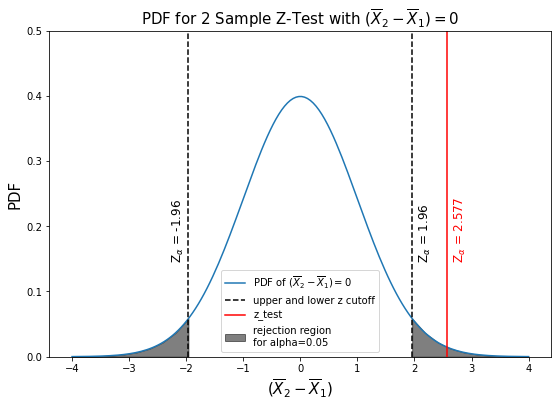

In [9]:
# visualize z test
f, ax = plt.subplots(figsize=(9,6))
x = np.linspace(-4, 4, num=160)
ax.plot(x, stats.norm.pdf(x, 0, 1), label='PDF of $(\overline{X}_2 - \overline{X}_1)=0$')
ax.axvline(lower_z_cutoff, color='black', linestyle='--', label=f'upper and lower z cutoff')
ax.axvline(upper_z_cutoff, color='black', linestyle='--')
shade1 = np.linspace(upper_z_cutoff, np.max(x), 10)
ax.fill_between(shade1, stats.norm.pdf(shade1, 0, 1) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(alpha,2)))
shade2 = np.linspace(np.min(x), lower_z_cutoff, 10)
ax.fill_between(shade2, stats.norm.pdf(shade2, 0, 1) ,  color='k', alpha=0.5)
ax.axvline(z_test, color='red', linestyle='-', label=f'z_test')
plt.text(lower_z_cutoff-0.3, 0.15, r'Z$_{\alpha}$ = '+ str(round(lower_z_cutoff,3)),fontsize=12, color='k',rotation=90)
plt.text(upper_z_cutoff+0.1, 0.15, r'Z$_{\alpha}$ = '+ str(round(upper_z_cutoff,3)),fontsize=12, color='k',rotation=90)
plt.text(z_test+0.1, 0.15, r'Z$_{\alpha}$ = '+ str(round(z_test,3)),fontsize=12, color='r',rotation=90)
ax.set_ylim((0,0.5))
ax.set_title('PDF for 2 Sample Z-Test with $(\overline{X}_2 - \overline{X}_1)=0$',fontsize=15)
ax.set_xlabel('($\overline{X}_2 - \overline{X}_1$)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.legend();

* *Calculate P after your test.*

In [10]:
# calculate p
p = 2*stats.norm.cdf(-1*z_test)
print(f'p = {p:.4}')

p = 0.009964


Since this is a two tailed test, we remember to multiply by 2 when calculating the p value. This confirms our rejection of the null hypothesis, as $p$ (0.01) $<$ $\alpha$ (0.05)

* *How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)*

In [11]:
# try new null hypothesis and calc z test
delta_25 = 0.25*mean_before
z_test_25 = ((mean_after - mean_before) - delta_25) / std_pooled
p_25 = 2*stats.norm.cdf(-1*z_test_25)
print(f'for X_2-X_1 = 0.25*X_1, z = {z_test_25:.4}')
print(f'for X_2-X_1 = 0.25*X_1, p = {p_25:.4}')

for X_2-X_1 = 0.25*X_1, z = 0.6165
for X_2-X_1 = 0.25*X_1, p = 0.5376


With a new null hypothesis of the difference of means being 25% of the pre-1977 mean, we conduct the same 2 sample 2 tailed z test. The result is a test statistic of $z = 0.61$ with a p value of $p = 0.54$. Therefore, because $p < \alpha$ we fail to reject the null hypothesis.

Visualized, this looks like:

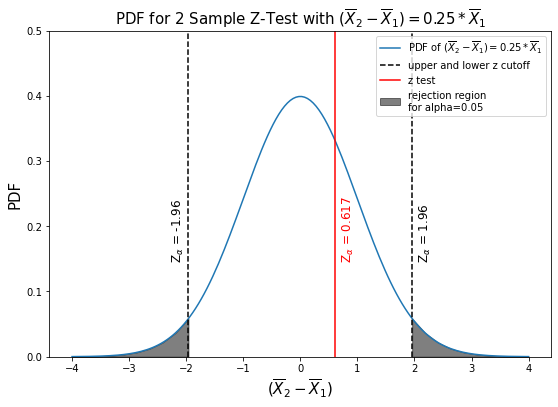

In [12]:
# visualize new hypothesis test
f, ax = plt.subplots(figsize=(9,6))
ax.plot(x, stats.norm.pdf(x, 0, 1), label='PDF of $(\overline{X}_2 - \overline{X}_1)=0.25*\overline{X}_1$')
ax.axvline(lower_z_cutoff, color='black', linestyle='--', label=f'upper and lower z cutoff')
ax.axvline(upper_z_cutoff, color='black', linestyle='--')
ax.axvline(z_test_25, color='red', linestyle='-', label=f'z test')
shade1 = np.linspace(upper_z_cutoff, np.max(x), 10)
ax.fill_between(shade1, stats.norm.pdf(shade1, 0, 1) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(alpha,2)))
shade2 = np.linspace(np.min(x), lower_z_cutoff, 10)
ax.fill_between(shade2, stats.norm.pdf(shade2, 0, 1) ,  color='k', alpha=0.5)
plt.text(lower_z_cutoff-0.3, 0.15, r'Z$_{\alpha}$ = '+ str(round(lower_z_cutoff,3)),fontsize=12, color='k',rotation=90)
plt.text(upper_z_cutoff+0.1, 0.15, r'Z$_{\alpha}$ = '+ str(round(upper_z_cutoff,3)),fontsize=12, color='k',rotation=90)
plt.text(z_test_25+0.1, 0.15, r'Z$_{\alpha}$ = '+ str(round(z_test_25,3)),fontsize=12, color='r',rotation=90)
ax.set_ylim((0,0.5))
ax.set_title('PDF for 2 Sample Z-Test with $(\overline{X}_2 - \overline{X}_1)=0.25*\overline{X}_1$',fontsize=15)
ax.set_xlabel('($\overline{X}_2 - \overline{X}_1$)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.legend();

## C. Type II Error: What is the type II error and power for your test on the mean in the first part of B above?

* *To answer this, assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).*
* *Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.*

In [13]:
# calculate z_eff
sigma_prime = std_pooled
#z_alpha = stats.norm.ppf(1-alpha/2)
z_alpha = [lower_z_cutoff,upper_z_cutoff]
delta_star = 0.25*mean_before
sigma_star = 1.2*std_pooled
# Rearranging the equation above to solve for the "z effective" value, the z value on our postulated "true" PDF
z_eff = ((delta_0 + z_alpha[1]*sigma_prime) - delta_star) / sigma_star
beta = stats.norm.cdf(z_eff)
print(f'Beta value of {beta:.4}')
print(f'Power of {1-beta:.4}')

Beta value of 0.4998
Power of 0.5002


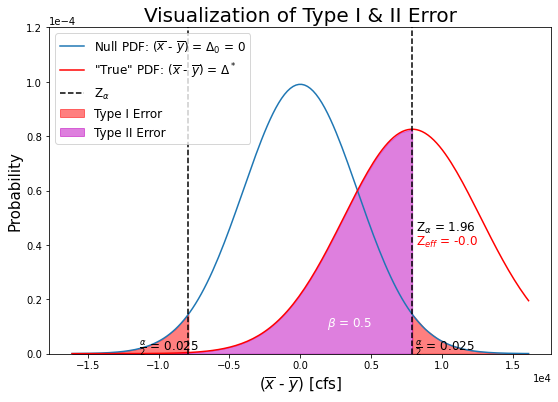

In [14]:
# Make a plot
plt.figure(figsize=(9,6))

# Create values for z
z = np.linspace(-4, 4, num=160) * sigma_prime
alpha = 0.025   
# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z, delta_0, sigma_prime), label='Null PDF: ($\overline{x}$ - $\overline{y}$) = $\Delta_0$ = 0')

## Plot the postulated True PDF
plt.plot(z, stats.norm.pdf(z, delta_star, sigma_star), color='red', label=r'"True" PDF: ($\overline{x}$ - $\overline{y}$) = $\Delta^*$')

# Plot where z_alpha is
plt.axvline(z_alpha[1]*sigma_prime, color='black', linestyle='--', label=r'Z$_\alpha$')
plt.axvline(z_alpha[0]*sigma_prime, color='black', linestyle='--')

# Add labels here with z_alpha and z_eff values
plt.text(z_alpha[1]*sigma_prime+300, 4e-5, r'Z$_{eff}$ = ' + str(round(z_eff,2)),fontsize=12, color='r')
plt.text(z_alpha[1]*sigma_prime+300, 4.5e-5, r'Z$_{\alpha}$ = ' + str(round(z_alpha[1],2)),fontsize=12, color='k')

# Shade in the Type I Error area
shade = np.linspace(z_alpha[1]*sigma_prime, np.max(z), 10)
plt.fill_between(shade, stats.norm.pdf(shade, delta_0, sigma_prime) ,  color='red', alpha=0.5, label='Type I Error')
shade = np.linspace(np.min(z),z_alpha[0]*sigma_prime, 10)
plt.fill_between(shade, stats.norm.pdf(shade, delta_0, sigma_prime) ,  color='red', alpha=0.5)

# Add label here with alpha value
plt.text(z_alpha[1]*sigma_prime+200, 0.1e-5, r'$\frac{\alpha}{2}$ = ' + str(round(alpha,3)),fontsize=12, color='k')
plt.text(z_alpha[0]*sigma_prime-3500, 0.1e-5, r'$\frac{\alpha}{2}$ = ' + str(round(alpha,3)),fontsize=12, color='k')


# Shade in the Type II Error area
shade = np.linspace(np.min(z),z_alpha[1]*sigma_prime, 30)
plt.fill_between(shade, stats.norm.pdf(shade, delta_star, sigma_star) ,  color='m', alpha=0.5, label='Type II Error')
# Add label here with Beta value
plt.text(z_alpha[1]*sigma_prime-6000, 1e-5, r'$\beta$ = ' + str(round(beta,2)),fontsize=12, color='w')

# Add title, legend, and labels
plt.title('Visualization of Type I & II Error',fontsize=20)
plt.xlabel('($\overline{x}$ - $\overline{y}$) [cfs]', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 12e-5)

plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.legend(loc='upper left',fontsize=12);

* *Then answer the question - what is the type II error and power for your test in part B?*

The type II error is $\beta = 0.4998$, and the power is $power = 1-\beta = 0.5002$!

## D. Wilcoxan Rank Sum Test:

* *Now test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test.*

In [15]:
z_wilcoxan, p_wilcoxan = stats.ranksums(Sauk_data_after_1977['peak_va'], Sauk_data_before_1977['peak_va'])

print(f'Z from stats.ranksums: {z_wilcoxan:.4}')
print(f'p from stats.ranksums: {p_wilcoxan:.4}')

Z from stats.ranksums: 2.497
p from stats.ranksums: 0.01251


* *How different is your conclusion from the one in part B. (i.e. compare P for the two tests).*

In [16]:
print(f'p from z test in part b: {p:.5}')
print(f'p from stats.ranksums: {p_wilcoxan:.5}')
print(f'The absolute difference between the p values: {np.abs(p-p_wilcoxan):.5}')
print(f'The percent difference between the p values: {np.abs(p-p_wilcoxan)/p*100:.5}%')

p from z test in part b: 0.0099643
p from stats.ranksums: 0.012514
The absolute difference between the p values: 0.0025495
The percent difference between the p values: 25.587%


As you can see, the Wilcoxan Rank Sum Test yields a similar but not identical (~20%/25% difference depending how you measure) p value. After some digging, it looks like these two tests seek to understand similar things, but the Wilcoxan Sum Test does not assume a normal distribution as our z test does. This allows the Wilcoxan Sum Test to have greater flexibility as it operates on the medians of the data instead of the means, acting as a non-parametric version of the two sample z test. In our case, we've made an assumption of normality, so I suspect the two sample z test is more appropriate for our purposes.

## E. Chi Squared test for a change in the standard deviation: Lastly test for statistical significance of a change in the standard deviation.

* *Even though it is not strictly true, assume that the sample data are derived from a normally distributed population. (While not required for this homework, we can follow up on the importance of this assumption by using Monte Carlo Tests as shown in Lab 2-3.)*
* *Use a single sample test (with rejection region based on the Chi Squared distribution), and assume that the sample standard deviation that you calculated from the 1929-1976 data is close to the true population standard deviation that you are testing for a change from.*

First, lets calculate our before and after standard deviations, as well as our sample size.

In [17]:
# get before and after standard deviations
std_before = Sauk_data_before_1977['peak_va'].std()
std_after = Sauk_data_after_1977['peak_va'].std()
m = Sauk_data_after_1977['peak_va'].count()

Use  ${t} = \frac{(n-1)s^2}{\sigma^2}$ to calculate the test statistic:

In [18]:
# calculate test statistic using above formula
t = ((m-1)*std_after**2)/std_before**2
print(f't statistic of: {t:.5}')

t statistic of: 81.393


Now compare to the cutoff level on the Chi Squared distribution corresponding to $\alpha = 0.05$ and $m = 44$:

In [19]:
# calculate cutoff chi squared value
alpha = 0.05
cutoff = stats.chi2.ppf(alpha, m-1)
print(f'cutoff value of statistic for significance: {cutoff:.5}')

cutoff value of statistic for significance: 28.965


Since our t statistic value ($t = 81.393$) is greater than our cutoff chi squared value ($\chi^2 = 28.965$) for significance at the $\alpha=0.05$ level, we can say with 95% confidence that there was indeed a change in standard deviation.

## Problem 2: Course Project Selection (CEWA 565 only)
* *Write a brief paragraph (3-9 sentences) describing your term project. Include the name of your partner (or specify you will be doing the project alone), the data you will analyze, and which question(s) you will answer. Which statistical tools will you use? If you have a hypothesis to test, write it down. If you have questions about the project, now is the time to talk to the instructor.*

Seth Vanderwilt and I will use Synthetic Aperture Radar (SAR) backscatter time series to explore snow melt dynamics during this past summer. We hope to focus on snow melt timings and how they might have differed from previous years to this year, particularly over Mt. Rainier. Mt. Rainier will be a good test site because we know it experienced a quite extreme melt season this year, as well as the fact that other groups will also be looking at Mt. Rainier, which will hopefully allow some intercomparison. We will use a statistical test for significance: our null hypothesis is that snow melt timing this past summer is not different from previous years, and the alternate hyopthesis is that snow melt timing this past summer is different from previous years. We will also explore spatial factors such as aspect and elevation. These null hyoptheses will be snow melt timing is not affected by (aspect,elevation). The alternaute hyoptheses will be snow melt timing is affected by (aspect, elevation).

# References

Note: A large amount of this code is adapted from the CEWA 565 course materials, predominantly from the lab 2 jupyter notebooks which can be found in module 2 of the class website: https://mountain-hydrology-research-group.github.io/data-analysis/modules/module2.html